In [1]:
!pip install pandas
!pip install yfinance
!pip install scipy

In [2]:
import pandas as pd
import yfinance as yf
from scipy import stats
from scipy.stats import norm
import pylab

In [3]:
ativos_var = ['PETR4.SA', 'VALE3.SA', 'CMIG3.SA']
port_var = yf.download(ativos_var, start='2021-01-01', end='2024-12-31')['Close']
port_var.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


Ticker,CMIG3.SA,PETR4.SA,VALE3.SA
Date,,,
2021-01-04,5.666586,9.379413,57.578629
2021-01-05,5.698205,9.746023,58.548138
2021-01-06,5.807109,9.765490,60.468266
2021-01-07,5.743875,10.057481,64.415550
2021-01-08,6.102208,10.096410,64.214088


In [4]:
port_var['port_cmig'] = 1000*port_var['CMIG3.SA']
port_var['port_petr'] = 1000*port_var['PETR4.SA']
port_var['port_vale'] = 1000*port_var['VALE3.SA']
port_var['port'] = port_var['port_cmig']+port_var['port_petr']+port_var['port_vale']
port_var['port_cmig%'] = port_var['port_cmig']/port_var['port']
port_var['port_petr%'] = port_var['port_petr']/port_var['port']
port_var['port_vale%'] = port_var['port_vale']/port_var['port']
port_var.head()

Ticker,CMIG3.SA,PETR4.SA,VALE3.SA,port_cmig,port_petr,port_vale,port,port_cmig%,port_petr%,port_vale%
Date,,,,,,,,,,
2021-01-04,5.666586,9.379413,57.578629,5666.585922,9379.412651,57578.628540,72624.627113,0.078026,0.129149,0.792825
2021-01-05,5.698205,9.746023,58.548138,5698.204517,9746.023178,58548.137665,73992.365360,0.077011,0.131717,0.791273
2021-01-06,5.807109,9.765490,60.468266,5807.109356,9765.489578,60468.265533,76040.864468,0.076368,0.128424,0.795207
2021-01-07,5.743875,10.057481,64.415550,5743.874550,10057.480812,64415.550232,80216.905594,0.071604,0.125379,0.803017
2021-01-08,6.102208,10.096410,64.214088,6102.208138,10096.409798,64214.088440,80412.706375,0.075886,0.125557,0.798556


<Axes: xlabel='Date'>

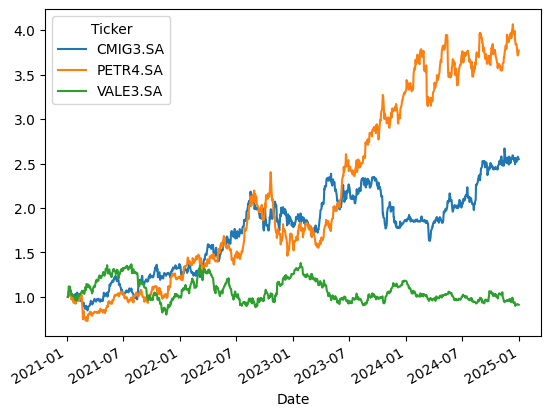

In [5]:
(port_var.iloc[:,:3]/port_var.iloc[0,:3]).plot()

<Axes: xlabel='Date'>

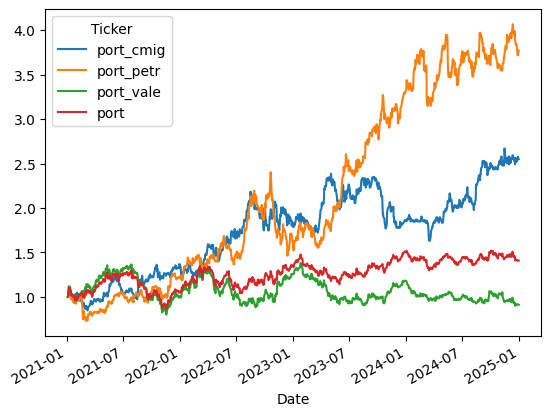

In [6]:
(port_var.iloc[:,3:7]/port_var.iloc[0,3:7]).plot()

In [7]:
port_var['ret_cmig_21'] = port_var['port_cmig'] / port_var['port_cmig'].shift(21) - 1
port_var['ret_petr_21'] = port_var['port_petr'] / port_var['port_petr'].shift(21) - 1
port_var['ret_vale_21'] = port_var['port_vale'] / port_var['port_vale'].shift(21) - 1
port_var['ret_port_21'] = port_var['port'] / port_var['port'].shift(21) - 1
port_var.dropna(inplace=True)
port_var.head()

Ticker,CMIG3.SA,PETR4.SA,VALE3.SA,port_cmig,port_petr,port_vale,port,port_cmig%,port_petr%,port_vale%,ret_cmig_21,ret_petr_21,ret_vale_21,ret_port_21
Date,,,,,,,,,,,,,,
2021-02-03,5.944120,9.389146,56.930199,5944.120407,9389.145851,56930.198669,72263.464928,0.082256,0.129929,0.787814,0.048977,0.001038,-0.011262,-0.004973
2021-02-04,5.866831,9.350213,56.212513,5866.831303,9350.213051,56212.512970,71429.557323,0.082135,0.130901,0.786964,0.029593,-0.040612,-0.039892,-0.034636
2021-02-05,5.810622,9.356701,58.352989,5810.622215,9356.700897,58352.989197,73520.312309,0.079034,0.127267,0.793699,0.000605,-0.041861,-0.034982,-0.033147
2021-02-08,5.852779,9.119864,59.183987,5852.778912,9119.863510,59183.986664,74156.629086,0.078925,0.122981,0.798094,0.018960,-0.093226,-0.081216,-0.075549
2021-02-09,5.779005,8.934937,59.335075,5779.004574,8934.936523,59335.075378,74049.016476,0.078043,0.120662,0.801295,-0.052965,-0.115038,-0.075980,-0.079138


<Axes: xlabel='Date'>

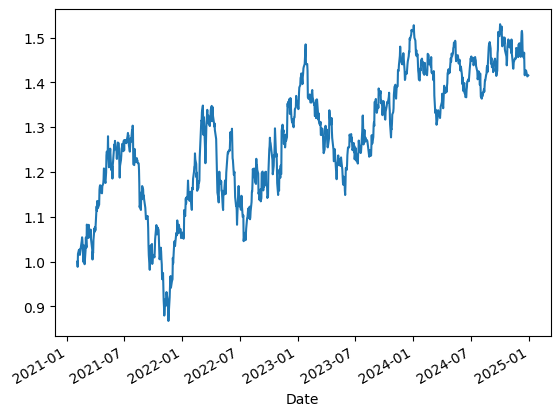

In [8]:
(port_var['port']/port_var['port'].iloc[0]).plot()

In [9]:
normaltest_port=stats.normaltest(port_var['ret_port_21'])
print(normaltest_port)

NormaltestResult(statistic=np.float64(0.02352009261912378), pvalue=np.float64(0.9883088327636093))


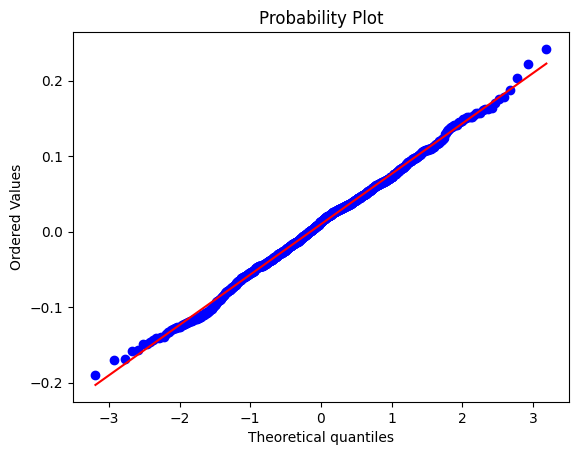

In [10]:
stats.probplot(port_var['ret_port_21'], dist="norm", plot=pylab)
pylab.show()

In [11]:
desv_pad_cmig = port_var['ret_cmig_21'].std()
desv_pad_petr = port_var['ret_petr_21'].std()
desv_pad_vale = port_var['ret_vale_21'].std()

In [12]:
var_cmig= port_var['ret_cmig_21'].mean()-(norm.ppf(0.05)*-1*desv_pad_cmig)
var_petr= port_var['ret_petr_21'].mean()-(norm.ppf(0.05)*-1*desv_pad_petr)
var_vale= port_var['ret_vale_21'].mean()-(norm.ppf(0.05)*-1*desv_pad_vale)

print('VaR CMIG (%) 95%CI: ', var_cmig*100)
print('VaR PETR:(%) 95%CI', var_petr*100)
print('VaR VALE:(%) 95%CI', var_vale*100)

VaR CMIG (%) 95%CI:  -12.566019149604577
VaR PETR:(%) 95%CI -13.714488674906242
VaR VALE:(%) 95%CI -14.020810796351219


In [13]:
vari_cmig=desv_pad_cmig**2
vari_petr=desv_pad_petr**2
vari_vale=desv_pad_vale**2
cov_cmig_petr = port_var['ret_cmig_21'].cov(port_var['ret_petr_21'])
cov_cmig_vale = port_var['ret_cmig_21'].cov(port_var['ret_vale_21'])
cov_petr_vale = port_var['ret_petr_21'].cov(port_var['ret_vale_21'])
wcmig=port_var['port_cmig%'].iloc[-1]
wpetr=port_var['port_petr%'].iloc[-1]
wvale=port_var['port_vale%'].iloc[-1]

In [14]:
vari_port=(wcmig*vari_cmig+wpetr*vari_petr+wvale*vari_vale)+(2*wcmig*wpetr*cov_cmig_petr)+(2*wcmig*wvale*cov_cmig_vale)+(2*wpetr*wvale*cov_petr_vale)
desv_pad_port=vari_port**0.5
print('Value at Risk Portfólio:', (port_var['ret_port_21'].mean()-(-1*norm.ppf(0.05)*desv_pad_port)*100).round(2),"%")

Value at Risk Portfólio: -15.61 %
